Saving Screenshot 2025-02-01 133933.png to Screenshot 2025-02-01 133933 (3).png
Image uploaded successfully.


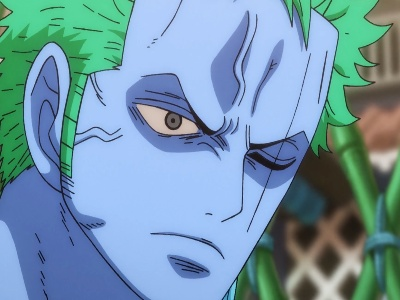

Original Image Size: 1734x1079 (Width x Height)
Total Pixels: 1870986


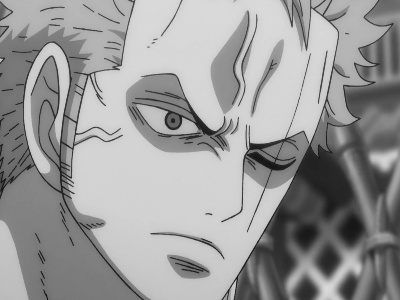

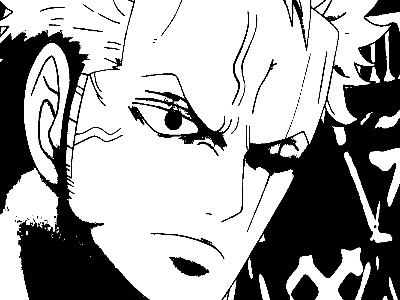

Black Pixels Count: 669191


In [6]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import display
from PIL import Image

uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

img = cv2.imread(image_path)
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image (e.g., width = 400, height = 400)
    img_rgb_resized = cv2.resize(img_rgb, (400, 300))
    cv2.imwrite("image_rgb_resized.jpg", img_rgb_resized)

    # Display the resized RGB image
    display(Image.open("image_rgb_resized.jpg"))

    # Extract image size
    height, width, channels = img.shape
    print(f"Original Image Size: {width}x{height} (Width x Height)")

    # Calculate total pixels
    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")

    # Convert to Grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the grayscale image
    img_gray_resized = cv2.resize(img_gray, (400, 300))
    cv2.imwrite("image_gray_resized.jpg", img_gray_resized)

    # Display the resized Grayscale image
    display(Image.open("image_gray_resized.jpg"))

    # Convert to Binary using threshold
    _, img_binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

    # Resize the binary image
    img_binary_resized = cv2.resize(img_binary, (400, 300))
    cv2.imwrite("image_binary_resized.jpg", img_binary_resized)

    # Display the resized Binary image
    display(Image.open("image_binary_resized.jpg"))

    # Count black pixels in the Binary image
    black_pixels = np.sum(img_binary == 0)
    print(f"Black Pixels Count: {black_pixels}")


Saving Screenshot 2025-01-31 231716.png to Screenshot 2025-01-31 231716.png
Image uploaded successfully.


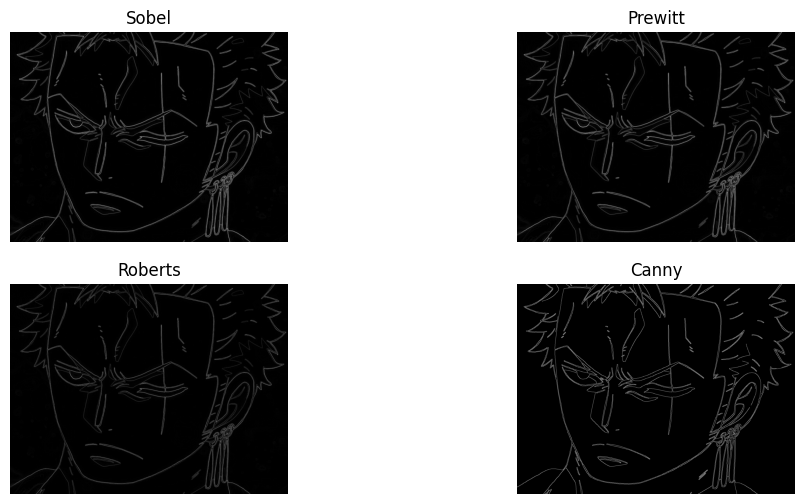

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from google.colab import files

# Upload image
uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

# Read the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")

    # 1. Edge Detection
    # Sobel Operator
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # Prewitt Operator (Fixed)
    prewitt_x = prewitt(img)
    prewitt_y = prewitt(img)
    prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Roberts Cross Operator
    roberts_cross = roberts(img)

    # Canny Edge Detector
    canny_edges = cv2.Canny(img, 100, 200)

    # Display Edge Detection Results
    edge_titles = ["Sobel", "Prewitt", "Roberts", "Canny"]
    edge_images = [sobel_combined, prewitt_combined, roberts_cross, canny_edges]

    plt.figure(figsize=(12, 6))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(edge_images[i], cmap='gray')
        plt.title(edge_titles[i])
        plt.axis('off')
    plt.show()
